<a href="https://colab.research.google.com/github/farisikhhaq/carpark_project/blob/master/project_pcvk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UAS PROJECT Pengolahan Citra dan Visi Komputer:** Carpark

# NAMA ANGGOTA :
Faris Ikhlasul Haq   ( 06 / 1941720062 )

Irfan Thalib Alfarid ( 11 /1941720039 )

**Dosen Pengampu** : 

Dr. Eng. Rosa Andrie Asmara, S.T., M.T.

**Deskripsi :**

Pada Tugas Akhir mata kuliah Pengolahan Citra dan Visi Komputer, kami mengambil tema mengenai Carpark. dengan menggunakan Sobel dan Yolo. Yolo sendiri sebagai alternatif cara untuk mendeteksi jumlah banyaknya mobil dan sobel untuk mendeteksi setiap garis putih.


In [ ]:
# Melakukan Import Liblary
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import os
from PIL import Image
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


ALTERNATIF : **YOLO**
Digunakan sebagai object detection

**REFERENSI** : 
- https://towardsdatascience.com/yolo-object-detection-with-opencv-and-python-21e50ac599e9

- https://medium.com/analytics-vidhya/real-time-object-detection-using-yolov3-with-opencv-and-python-64c985e14786

- https://pysource.com/2019/06/27/yolo-object-detection-using-opencv-with-python/

- https://www.youtube.com/watch?v=1LCb1PVqzeY

In [ ]:
# Mengambil Data Yolo Wights dan cfg / configuration

!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

--2022-06-15 22:03:28--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  45.2MB/s    in 5.6s    

2022-06-15 22:03:34 (42.2 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]

--2022-06-15 22:03:34--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg.1’

yolov3.cfg.1        100%[===================>]   8.15K  --.-KB/s    in 0s 

In [ ]:
# Memproses Yolo
net = cv.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [ ]:
# Menampilkan isi kelas yang tersedia pada Yolo
print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
#Menambahkan Gambar
img =cv.imread("/content/drive/MyDrive/PCVK_MM/image/TugasBesar/CarPark/Salinan 2012-10-26_06_59_26.jpg")
# https://drive.google.com/drive/folders/1W93SCzRULgtjMeoPG9fgr_s3juAOV83P?usp=sharing
img = cv.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

In [ ]:
# Mereduce gambar Menjadi 1280x1280 untuk memproses gambar lebih cepat menggunakan blob
scale = 0.00392
blob = cv.dnn.blobFromImage(img, scale, (1280, 1280), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [ ]:
# Informasi Data
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        # Disini saya mencoba menggunakan nilai confidence sebesar 0.3 , untuk standartnya adalah 0.3 namun semakin tinggi nilai confidence nya maka akan semakin besar accuracy
        # Namun objek yang terdeteksi semakin kecil yang didapat semakin kecil
        if confidence > 0.3:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Koordinate Persegi
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv.dnn.NMSBoxes(boxes, confidences, 0.4, 0.6)

In [ ]:
font = cv.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv.rectangle(img, (x, y), (x + w, y + h), color, 2)

        cv.putText(img, '', (x, y-10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 1)

In [ ]:
# Menghitung Jumlah Kendaraan dengan mengambil nilai index pada dan menyimpan nya di count agar dapat diambil nilainya pada proses selanjutnya
count = len(indexes)

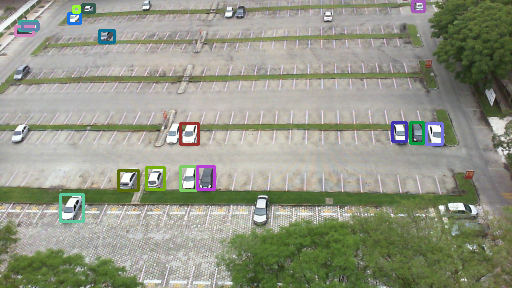

In [ ]:
# HASIL
cv2_imshow(img)

**MENGECEK PARKIRAN APAKAH PENUH ATAU TIDAK DENGAN DETEKSI TEPI (SOBEL)**

**REFERENSI :**
- https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html
- https://matplotlib.org/2.2.2/gallery/subplots_axes_and_figures/subplots_demo.html

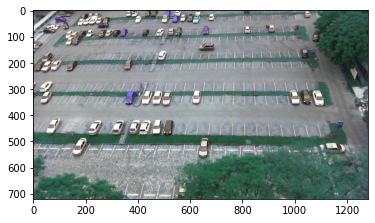

In [ ]:
#Melakukan Import Gambar
imgCar = cv.imread('/content/drive/MyDrive/PCVK_MM/image/TugasBesar/CarPark/2012-10-26_07_19_27.jpg')
image_arr = np.array(imgCar)
plt.imshow(imgCar)

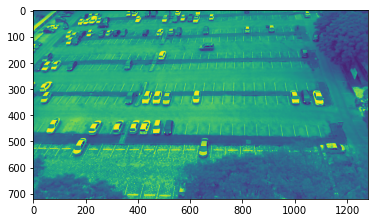

In [ ]:
#Melakukan konversi gambar ke grayscale dengan menggunakan cv.COLOR_BGR2GRAY yang merupakan bawaan opencv
imgGrayCar = cv.cvtColor(imgCar, cv.COLOR_BGR2GRAY)
plt.imshow(imgGrayCar)

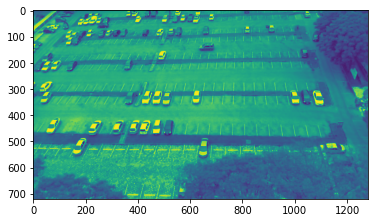

In [ ]:
# Mengurangi Noise Pada Gambar Dengan Kernel X = 3 dan Y = 3
imgBlurCar = cv.GaussianBlur(imgGrayCar,(3,3),0)
plt.imshow(imgBlurCar)

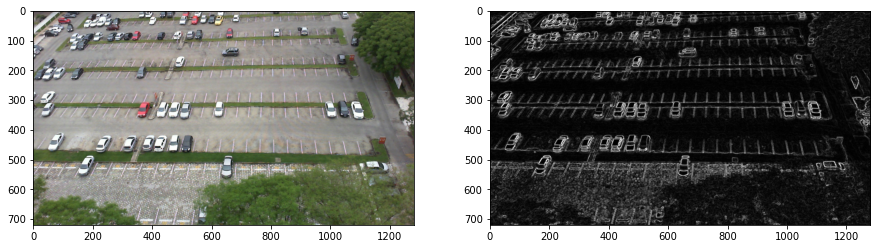

In [ ]:
img_sobelx = cv.Sobel(imgBlurCar, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(imgBlurCar, cv.CV_64F, 0, 1, ksize=3)

img_sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(imgCar, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(imgCar, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(img_sobelxy,cmap = 'gray')

number_of_white_pix = np.sum(img_sobelxy == 255)
number_of_black_pix = np.sum(img_sobelxy == 0)

Kondisi Parkiran : 
Masih Kosong
White Pixel: 237
Black Pixel:  6012
Akurasi Persentase:  3.7926068170907343 %


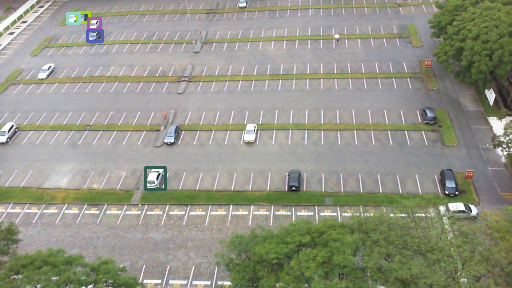

In [ ]:
#Membuat Logika Data Range Sesuai Data Yang Dihasilkan
print("Kondisi Parkiran : ")
if (number_of_white_pix > 3000 ):
  if(count > 150):
    print("Parkiran Penuh Sekali")
  else:
    print("Parkiran Penuh Sisa Sedikit")
elif (number_of_white_pix >= 1000 and number_of_white_pix <= 2999):
  if(count > 40 and count < 70):
    print("Parkiran Rame Sekali")
  else:
    print("Parkiran Rame Standar")
elif (number_of_white_pix >= 100 and number_of_white_pix <= 999):
  if(count > 7 and count < 20):
    print("Tersisa Banyak")
  else:
    print("Masih Kosong")
elif (number_of_white_pix < 100):
    print("Sepi")


threshold = (number_of_white_pix/(number_of_white_pix + number_of_black_pix)) * 100

print('White Pixel:', number_of_white_pix)
print('Black Pixel: ', number_of_black_pix)
print("Akurasi Persentase: ", threshold, "%")
cv2_imshow(img)

**Mendeteksi Objek Mobil Manual Tanpa Yolo (Irfan)**

REFERENSI :
- https://rsdharra.com/blog/lesson/26.html
- https://raw.githubusercontent.com/ratansingh98/100_Days_of_ML_Code_Continued/master/Days/mastering%20opencv%202/3.%20Car%20and%20Pedestrian%20Detection/cars.xml

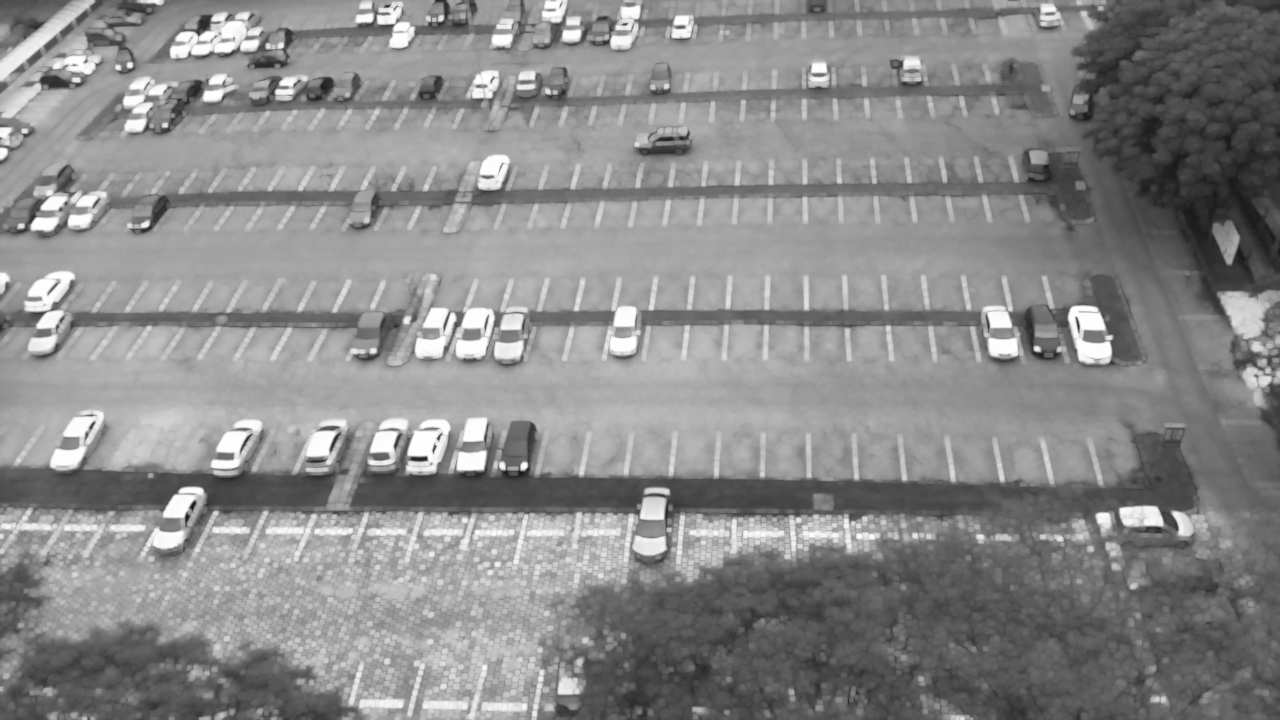

In [ ]:
dilated = cv.dilate(imgBlurCar,np.ones((3,3)))
Image.fromarray(dilated)

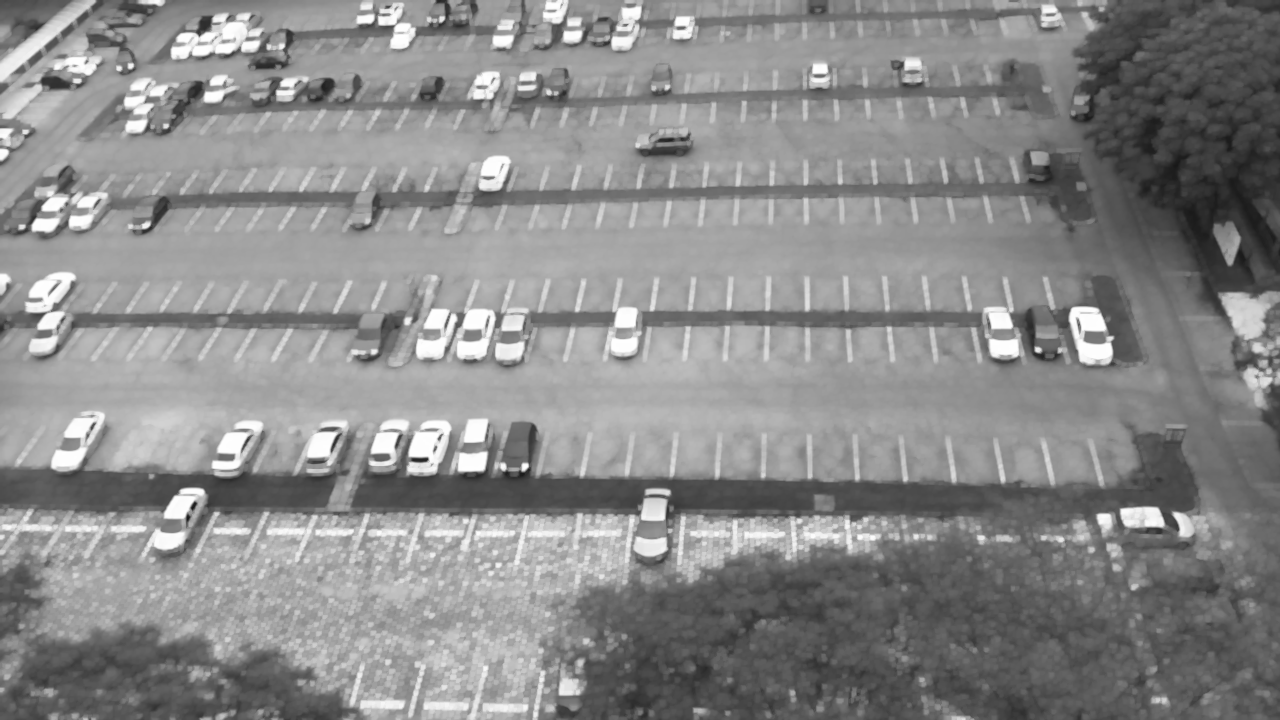

In [ ]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (2, 2))
closing = cv.morphologyEx(dilated, cv.MORPH_CLOSE, kernel) 
Image.fromarray(closing)

In [ ]:
car_cascade_src = '/content/drive/MyDrive/PCVK_MM/image/TugasBesar/CarPark/cars.xml'
car_cascade = cv.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(closing, 1.1, 1)

31  cars found


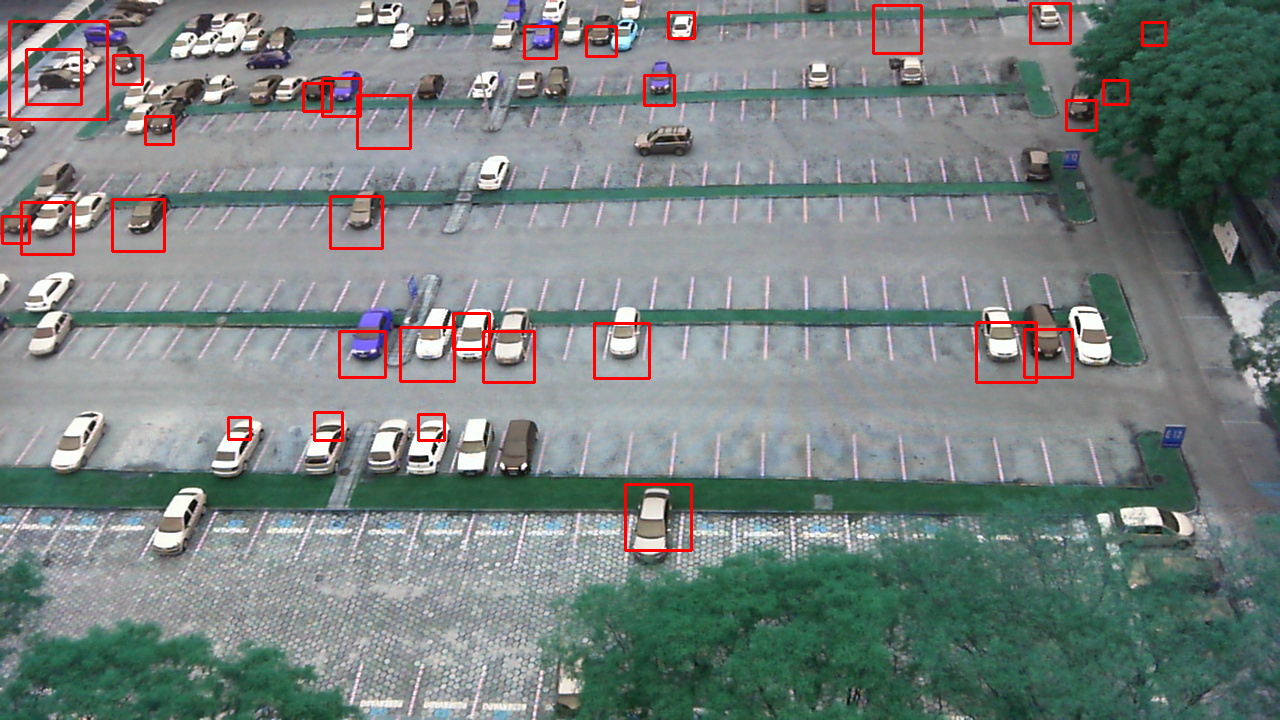

In [ ]:
cnt = 0
for (x,y,w,h) in cars:
  cv.rectangle(image_arr,(x,y),(x+w,y+h),(255,0,0),2)
  cnt += 1
print(cnt, " cars found")
Image.fromarray(image_arr)

**Melakukan Pengecekan Di Gambar Lain (Lanjutan Proses Yolo dan Sobel)** - IRFAN

Kondisi Parkiran : 
Sepi
White Pixel: 9
Black Pixel:  18472
Perkiraan Jumlah Kendaraan: 8
Akurasi Persentase:  0.04869866349223527 %


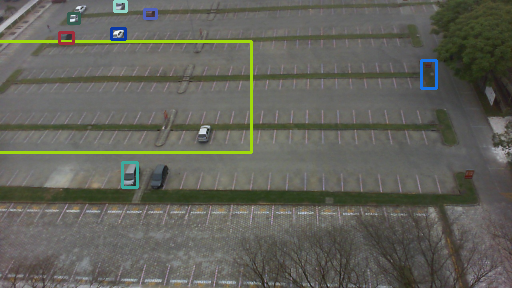

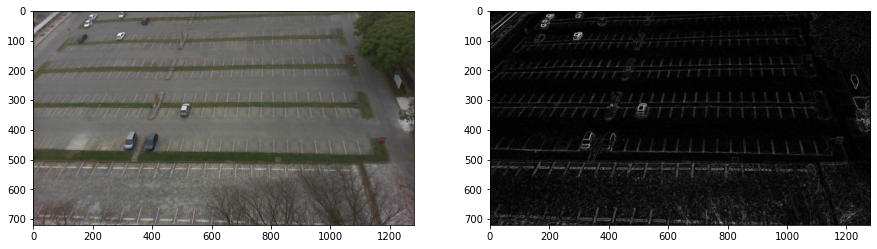

In [ ]:
#  Gambar 1

img =cv.imread("/content/drive/MyDrive/PCVK_MM/image/TugasBesar/CarPark/2012-09-16_07_57_59.jpg")
img = cv.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

scale = 0.00392
blob = cv.dnn.blobFromImage(img, scale, (1280, 1280), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

font = cv.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv.rectangle(img, (x, y), (x + w, y + h), color, 2)

        cv.putText(img, '', (x, y-10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 1)

count = len(indexes)

imgCar = cv.imread('/content/drive/MyDrive/PCVK_MM/image/TugasBesar/CarPark/2012-09-16_07_57_59.jpg')
image_arr = np.array(imgCar)

imgGrayCar = cv.cvtColor(imgCar, cv.COLOR_BGR2GRAY)

imgBlurCar = cv.GaussianBlur(imgGrayCar,(3,3),0)

img_sobelx = cv.Sobel(imgBlurCar, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(imgBlurCar, cv.CV_64F, 0, 1, ksize=3)

img_sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)
f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(imgCar, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(imgCar, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(img_sobelxy,cmap = 'gray')

number_of_white_pix = np.sum(img_sobelxy == 255)
number_of_black_pix = np.sum(img_sobelxy == 0)

print("Kondisi Parkiran : ")
if (number_of_white_pix > 3000 ):
  if(count > 150):
    print("Parkiran Penuh Sekali")
  else:
    print("Parkiran Penuh Sisa Sedikit")
elif (number_of_white_pix >= 1000 and number_of_white_pix <= 2999):
  if(count > 40 and count < 70):
    print("Parkiran Rame Sekali")
  else:
    print("Parkiran Rame Standar")
elif (number_of_white_pix >= 100 and number_of_white_pix <= 999):
  if(count > 7 and count < 20):
    print("Tersisa Banyak")
  else:
    print("Masih Kosong")
elif (number_of_white_pix < 100):
    print("Sepi")


threshold = (number_of_white_pix/(number_of_white_pix + number_of_black_pix)) * 100

print('White Pixel:', number_of_white_pix)
print('Black Pixel: ', number_of_black_pix)
print('Perkiraan Jumlah Kendaraan:', count)
print("Akurasi Persentase: ", threshold, "%")
cv2_imshow(img)

Kondisi Parkiran : 
Parkiran Rame Sekali
White Pixel: 2928
Black Pixel:  11900
Perkiraan Jumlah Kendaraan: 52
Akurasi Persentase:  19.74642568114378 %


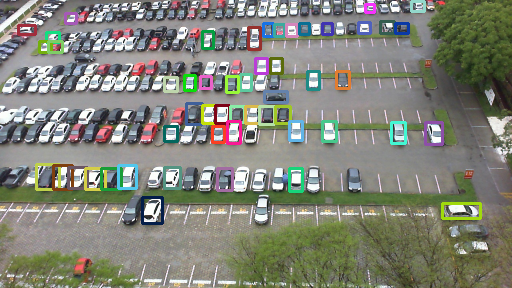

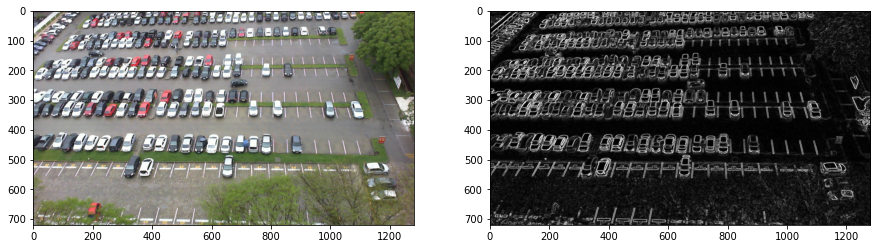

In [ ]:
#  Gambar 2

img =cv.imread("/content/drive/MyDrive/PCVK_MM/image/TugasBesar/CarPark/2012-10-11_07_56_28.jpg")
img = cv.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

scale = 0.00392
blob = cv.dnn.blobFromImage(img, scale, (1280, 1280), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

font = cv.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv.rectangle(img, (x, y), (x + w, y + h), color, 2)

        cv.putText(img, '', (x, y-10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 1)

count = len(indexes)

imgCar = cv.imread('/content/drive/MyDrive/PCVK_MM/image/TugasBesar/CarPark/2012-10-11_07_56_28.jpg')
image_arr = np.array(imgCar)

imgGrayCar = cv.cvtColor(imgCar, cv.COLOR_BGR2GRAY)

imgBlurCar = cv.GaussianBlur(imgGrayCar,(3,3),0)

img_sobelx = cv.Sobel(imgBlurCar, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(imgBlurCar, cv.CV_64F, 0, 1, ksize=3)

img_sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(imgCar, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(imgCar, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(img_sobelxy,cmap = 'gray')

number_of_white_pix = np.sum(img_sobelxy == 255)
number_of_black_pix = np.sum(img_sobelxy == 0)

#Create Category by Data Range
print("Kondisi Parkiran : ")
if (number_of_white_pix > 3000 ):
  if(count > 150):
    print("Parkiran Penuh Sekali")
  else:
    print("Parkiran Penuh Sisa Sedikit")
elif (number_of_white_pix >= 1000 and number_of_white_pix <= 2999):
  if(count > 40 and count < 70):
    print("Parkiran Rame Sekali")
  else:
    print("Parkiran Rame Standar")
elif (number_of_white_pix >= 100 and number_of_white_pix <= 999):
  if(count > 7 and count < 20):
    print("Tersisa Banyak")
  else:
    print("Masih Kosong")
elif (number_of_white_pix < 100):
    print("Sepi")


threshold = (number_of_white_pix/(number_of_white_pix + number_of_black_pix)) * 100

print('White Pixel:', number_of_white_pix)
print('Black Pixel: ', number_of_black_pix)
print('Perkiraan Jumlah Kendaraan:', count)
print("Akurasi Persentase: ", threshold, "%")
cv2_imshow(img)

Kondisi Parkiran : 
Masih Kosong
White Pixel: 237
Black Pixel:  6012
Perkiraan Jumlah Kendaraan: 5
Akurasi Persentase:  3.7926068170907343 %


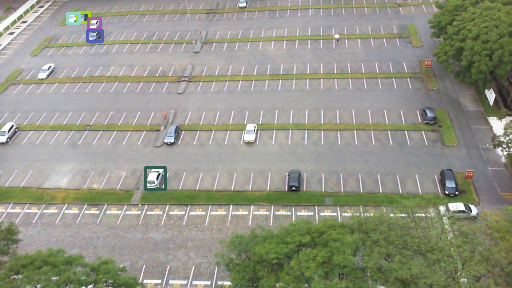

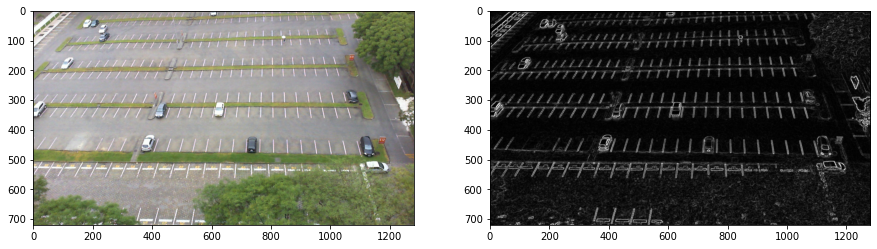

In [ ]:
#  Gambar 3

img =cv.imread("/content/drive/MyDrive/PCVK_MM/image/TugasBesar/CarPark/2012-11-09_06_56_32.jpg")
img = cv.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

scale = 0.00392
blob = cv.dnn.blobFromImage(img, scale, (1280, 1280), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

font = cv.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv.rectangle(img, (x, y), (x + w, y + h), color, 2)

        cv.putText(img, '', (x, y-10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 1)

count = len(indexes)

#image Path
imgCar = cv.imread('/content/drive/MyDrive/PCVK_MM/image/TugasBesar/CarPark/2012-11-09_06_56_32.jpg')
image_arr = np.array(imgCar)

#convert to grayscale
imgGrayCar = cv.cvtColor(imgCar, cv.COLOR_BGR2GRAY)

imgBlurCar = cv.GaussianBlur(imgGrayCar,(3,3),0)

img_sobelx = cv.Sobel(imgBlurCar, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(imgBlurCar, cv.CV_64F, 0, 1, ksize=3)

img_sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(imgCar, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(imgCar, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(img_sobelxy,cmap = 'gray')

number_of_white_pix = np.sum(img_sobelxy == 255)
number_of_black_pix = np.sum(img_sobelxy == 0)

#Create Category by Data Range
print("Kondisi Parkiran : ")
if (number_of_white_pix > 3000 ):
  if(count > 150):
    print("Parkiran Penuh Sekali")
  else:
    print("Parkiran Penuh Sisa Sedikit")
elif (number_of_white_pix >= 1000 and number_of_white_pix <= 2999):
  if(count > 40 and count < 70):
    print("Parkiran Rame Sekali")
  else:
    print("Parkiran Rame Standar")
elif (number_of_white_pix >= 100 and number_of_white_pix <= 999):
  if(count > 7 and count < 20):
    print("Tersisa Banyak")
  else:
    print("Masih Kosong")
elif (number_of_white_pix < 100):
    print("Sepi")


threshold = (number_of_white_pix/(number_of_white_pix + number_of_black_pix)) * 100

print('White Pixel:', number_of_white_pix)
print('Black Pixel: ', number_of_black_pix)
print('Perkiraan Jumlah Kendaraan:', count)
print("Akurasi Persentase: ", threshold, "%")
cv2_imshow(img)